# Hypothesis Testing Applications

### Some things that should be tested
1.  Check if sample size is sufficient
1.  It is best if the group sample sizes are similar; this typically leads to optimimum power
1.  Remove outliers if applicable, especially for small sample sizes
1.  Check for normality

### Select the appropriate test
* If comparing to a known populatoin, then use one-sample t-test.
* If comparing two groups that are independent of each other then use two-sample t-test
    * If variance is known then use the equal variance test
    * If variance is not known then use the unequal variance test (Welch's)
* If comparing the same group at two different times (direct tracking two responses from the same agent) then use paired t-test

### Select the appropriate tails
* Two tail is the safest since alpha is half of that of the single tail
* Choose a left or right test if there is a structural limit that prevents the test from being the other tail  

### Safest option
*  Using a two tail, unknown variance test is probably the safest (assuming not a paired problem).  


In [12]:
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as sc
import statsmodels.api as sm

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [44]:
rand_data = np.random.normal(loc=0, scale=1, size=500)
rand_data_alt = np.random.normal(loc=1.5, scale=1, size=500)

In [45]:
print(f'Records: {len(rand_data)}')
print(f'Min: {min(rand_data):0.3f}')
print(f'Max: {max(rand_data):0.3f}')
print(f'Mean: {st.mean(rand_data):0.3f}')
print(f'Median: {st.median(rand_data):0.3f}')

Records: 500
Min: -4.053
Max: 3.095
Mean: 0.082
Median: 0.045


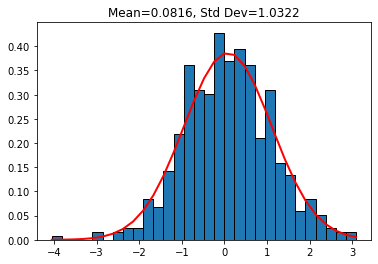

In [46]:
h = plt.hist(rand_data, bins=30, histtype='bar', density=1, ec='k') 
plt.plot(h[1], sc.norm.pdf(h[1], st.mean(rand_data), st.stdev(rand_data)), color='r', linewidth=2)
plt.title(r'Mean=%.4f, Std Dev=%.4f' %(st.mean(rand_data), st.stdev(rand_data)))
plt.show()

## Assumptions regarding 'rand_data'

In [47]:
# Skewness should be close to zero
sc.skew(rand_data)

-0.0321652615575365

In [48]:
# Shapiro-Wilk Test
# Null Hypothesis:  Distribution is Normally Distributed
# p-value < 0.05 indicates that there is non-normality
sc.shapiro(rand_data)

ShapiroResult(statistic=0.9965357184410095, pvalue=0.3564961552619934)

C:\Users\ejwda\Anaconda3\envs\PythonDataS2022\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


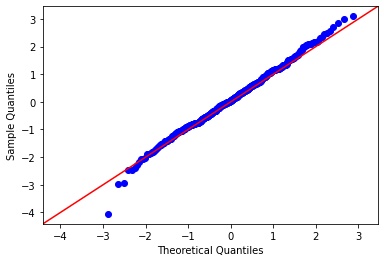

In [49]:
# QQ Plot
sm.qqplot(rand_data, line='45');
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show();

Mean: 0.082
Median: 0.045


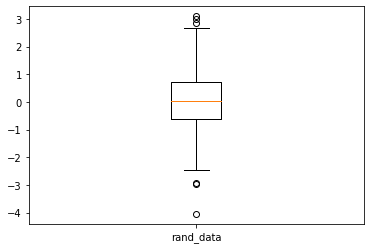

In [50]:
# Boxplot
# Normality is indicated by:
#    * the median being near the mean, 
#    * median being near center of box,
#    * whiskers being about the same size
plt.boxplot(rand_data, labels=['rand_data']);
print(f'Mean: {np.mean(rand_data):0.3f}')
print(f'Median: {np.median(rand_data):0.3f}')

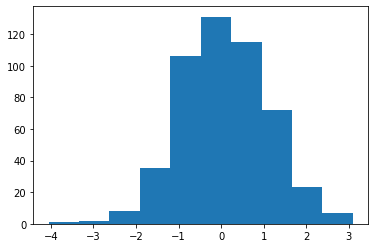

In [51]:
# Histogram 
# Normality is indicated by symmetry and general shape
plt.hist(rand_data);

# Hypothesis Test
- above shows rand_data is normally distributed
- assuming rand_data_2 is normally distributed since it was generated the same

#### T-Test [1 Sample, One Tail (right), Unknown Variance]

In [52]:
sc.ttest_1samp(rand_data_alt, st.mean(rand_data), alternative='greater')

Ttest_1sampResult(statistic=33.39375087066687, pvalue=1.3370366975243339e-129)

In [ ]:
# Since the p-value is small then we reject the null hypothesis that the sample mean came from the population.

#### T-Test [1 Sample, One Tail (left), Unknown Variance]

In [53]:
sc.ttest_1samp(rand_data_alt, st.mean(rand_data), alternative='less')

Ttest_1sampResult(statistic=33.39375087066687, pvalue=1.0)

In [ ]:
# Since the p-value is large then we fail to reject the null hypothesis and say nothing supports that the sample mean did not come from population

#### T-Test [1 Sample, Two Tail, Unknown Variance]

In [54]:
sc.ttest_1samp(rand_data_alt, st.mean(rand_data), alternative='two-sided')

Ttest_1sampResult(statistic=33.39375087066687, pvalue=2.6740733950486677e-129)

In [ ]:
# Since the p-value is small then we reject the null hypothesis that the sample mean came from the population.

#### T-Test [2 Independent Samples, One Tail (right), Equal Variance]

In [55]:
sc.ttest_ind(rand_data, rand_data_alt, alternative='greater')

Ttest_indResult(statistic=-22.35723411631786, pvalue=1.0)

#### T-Test [2 Independent Samples, One Tail (left), Equal Variance]

In [56]:
sc.ttest_ind(rand_data, rand_data_alt, alternative='less')

Ttest_indResult(statistic=-22.35723411631786, pvalue=2.2219071041531238e-90)

#### T-Test [2 Independent Samples, Two Tail, Equal Variance]

In [57]:
sc.ttest_ind(rand_data, rand_data_alt, alternative='two-sided')

Ttest_indResult(statistic=-22.35723411631786, pvalue=4.4438142083062475e-90)

#### T-Test [2 Independent Samples, One Tail (right), Unequal Variance]

In [59]:
sc.ttest_ind(rand_data, rand_data_alt, alternative='greater', equal_var=False)

Ttest_indResult(statistic=-22.35723411631786, pvalue=1.0)

#### T-Test [2 Independent Samples, One Tail (left), Unequal Variance]

In [60]:
sc.ttest_ind(rand_data, rand_data_alt, alternative='less', equal_var=False)

Ttest_indResult(statistic=-22.35723411631786, pvalue=3.2739686905924043e-90)

#### T-Test [2 Independent Samples, Two Tail, Unequal Variance]

In [61]:
sc.ttest_ind(rand_data, rand_data_alt, alternative='two-sided', equal_var=False)

Ttest_indResult(statistic=-22.35723411631786, pvalue=6.547937381184809e-90)

### T-Test [Paired Samples, One Tail (right)]

In [62]:
sc.ttest_rel(rand_data, rand_data_alt, alternative='greater')

Ttest_relResult(statistic=-23.13598254004903, pvalue=1.0)

### T-Test [Paired Samples, One Tail (left)]

In [63]:
sc.ttest_rel(rand_data, rand_data_alt, alternative='less')

Ttest_relResult(statistic=-23.13598254004903, pvalue=2.620609877736953e-81)

### T-Test [Paired Samples, Two Tail]

In [64]:
sc.ttest_rel(rand_data, rand_data_alt, alternative='two-sided')

Ttest_relResult(statistic=-23.13598254004903, pvalue=5.241219755473906e-81)

## Categorical Data

In [13]:
# Generate data
data = np.random.choice(  
     a=[0, 1, 2, 3],  
     size=500,  
     p=[0.5, 0.3, 0.15, 0.05]
    )

unique, counts = np.unique(data, return_counts=True)
contingency_table = np.asarray((counts)).reshape(2,2)
contingency_table

array([[257, 149],
       [ 80,  14]], dtype=int64)

### Z-Test [Proportions, l,r-2 Tail]
https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
* Use when the response is binary and the results are represented as a percent.

In [27]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest(5, nobs=80, value=0.05, alternative='two-sided', prop_var=False)
print(f"ChiSquareResult(statistic={stat}, pvalue={pval})")

ChiSquareResult(statistic=0.46188021535170054, pvalue=0.6441672226837103)


### Chi Square [Categorical Data]
* Relationship between two categorical variables

In [23]:
result = sc.chisquare(counts, f_exp=None, ddof=0, axis=0)
print(result)


result = sc.chisquare([250, 250, 250, 250], f_exp=None, ddof=0, axis=0)
print(result)


Power_divergenceResult(statistic=258.768, pvalue=8.304371964444305e-56)
Power_divergenceResult(statistic=0.0, pvalue=1.0)


### Fisher's Exact Test [Categorical Data/Proportional]
* Relationship between two categorical variables

In [21]:
statistic, pvalue = sc.fisher_exact(contingency_table, alternative='two-sided')
print(f"FisherExactResult(statistic={statistic}, pvalue={pvalue})")

FisherExactResult(statistic=0.3018456375838926, pvalue=2.7614513340413265e-05)


### Bartlett's Exact Test [Categorical Data/Proportional]
* Relationship between two categorical variables
* Better than Fisher's Exact Test for 2x2 contingency table

In [15]:
sc.barnard_exact(contingency_table, alternative='two-sided', pooled=True, n=500)

BarnardExactResult(statistic=-4.064218209993088, pvalue=6.282131169455997e-05)

### Note: See ANOVA notebook for ANOVA, MANOVA, and ANCOVA
* Testing sample means of multiple groups (Categorical groups)
* Testing continuous variable with multiple categorical groups

# Post Hoc Evaluation
- to be added in the future

In [ ]:
#  https://www.pythonfordatascience.org/anova-python/#test_with_python
